In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install kaggle
!pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-tei8vh66
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-tei8vh66
  Resolved https://github.com/rcmalli/keras-vggface.git to commit 719ad75625fe51436b9a9479114b3d136847e11a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8324 sha256=4dcb71021df96a68ec2701d8d5aca731a5c2fdd12019a0fff6045417c3ef448d
  Stored in directory: /tmp/pip-ephem-wheel-cache-xbsgpqej/wheels/7a/c1/6e/91fe8b6b4e174d76dfe5cdbe81806ea3439fdd681c289e73f8
Successfully built keras-vggface
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━

In [ ]:
! mkdir ~/kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vishesh1412/celebrity-face-image-dataset

mkdir: cannot create directory ‘/root/kaggle’: File exists
 98% 52.0M/52.9M [00:04<00:00, 20.6MB/s]
100% 52.9M/52.9M [00:04<00:00, 13.1MB/s]


In [ ]:
! unzip '/content/celebrity-face-image-dataset.zip'

Archive:  /content/celebrity-face-image-dataset.zip
  inflating: Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/002_8f8da10e.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/003_57612506.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/004_f61e7d0c.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/005_582c121a.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/006_9135205d.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/007_cabbfcbb.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/008_d1f87068.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/009_fb3e6174.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/010_f99d79e3.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/011_7344ca35.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/012_cfcd4007.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/013_95ecbd39.jpg  
  inflating: Celebrity Fa

In [ ]:
filename = "/usr/local/lib/python3.9/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

20951

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
from keras.models import Sequential,Model
from tensorflow.keras.applications import VGG16
from keras_vggface.vggface import VGGFace
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense,BatchNormalization
import keras
import shutil
import os

In [ ]:
x = []
y = []
datadir = r'/content/Celebrity Faces Dataset'
Categories = []
for file_label in os.listdir(datadir):
    Categories.append(file_label)
    for file_name in os.listdir(datadir+'/'+file_label):
        x.append(datadir+'/'+file_label+'/'+file_name)
        y.append(file_label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=34)

In [ ]:
print("x_train = ",len(x_train))
print("x_test = ",len(x_test))

x_train =  1440
x_test =  360


In [ ]:
os.mkdir('/content/train')
os.mkdir('/content/test')

In [ ]:
datadir = r'/content/'
for file_label in Categories:
    os.mkdir(datadir+'train/'+file_label)
    new=datadir+'train/'+file_label
    for file_name in x_train :
        if(file_name.find(file_label) != -1 ):
            shutil.copy2(file_name, new)


In [ ]:
for file_label in Categories:
    os.mkdir(datadir+'test/'+file_label)
    new=datadir+'test/'+file_label
    for file_name in x_test :
        if(file_name.find(file_label))>0:
            shutil.copy2(file_name, new)


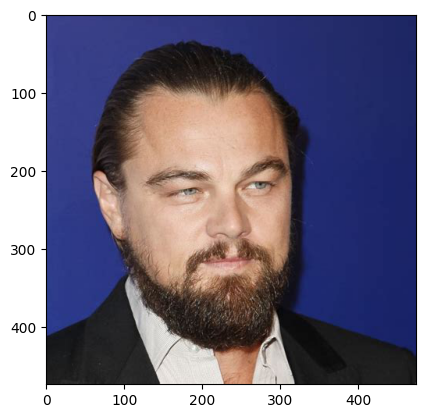

In [ ]:
image = load_img(x_train[87])
plt.imshow(image)

In [ ]:
image.size

(474, 474)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.15,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    '/content/train', 
    color_mode="rgb",
    target_size=(224,224),
    batch_size=12,
    class_mode='categorical'
)

Found 1440 images belonging to 17 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    '/content/test', 
    color_mode="rgb",
    target_size=(224,224),
    batch_size=4,
    class_mode='categorical'
)

Found 360 images belonging to 17 classes.


In [ ]:
model = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg')
for layer in model.layers:
    layer.trainable = False
x = model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
out = Dense(17, activation='softmax')(x)
model = Model(model.input, out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    mode='max'
)
res = model.fit(training_set,
          epochs = 64,
          callbacks=[custom_early_stopping],
          validation_data = test_set)

Epoch 1/64
120/120 [==============================] - 63s 217ms/step - loss: 2.9134 - accuracy: 0.2458 - val_loss: 2.7824 - val_accuracy: 0.1722
Epoch 2/64
120/120 [==============================] - 26s 215ms/step - loss: 1.9985 - accuracy: 0.4347 - val_loss: 2.5245 - val_accuracy: 0.2389
Epoch 3/64
120/120 [==============================] - 26s 215ms/step - loss: 1.6718 - accuracy: 0.5153 - val_loss: 2.0361 - val_accuracy: 0.4222
Epoch 4/64
120/120 [==============================] - 26s 217ms/step - loss: 1.5303 - accuracy: 0.5514 - val_loss: 1.5988 - val_accuracy: 0.4917
Epoch 5/64
120/120 [==============================] - 26s 215ms/step - loss: 1.4487 - accuracy: 0.5625 - val_loss: 1.3014 - val_accuracy: 0.5750
Epoch 6/64
120/120 [==============================] - 26s 216ms/step - loss: 1.3398 - accuracy: 0.6056 - val_loss: 1.1236 - val_accuracy: 0.6306
Epoch 7/64
120/120 [==============================] - 26s 215ms/step - loss: 1.2447 - accuracy: 0.6125 - val_loss: 1.0483 - val_ac

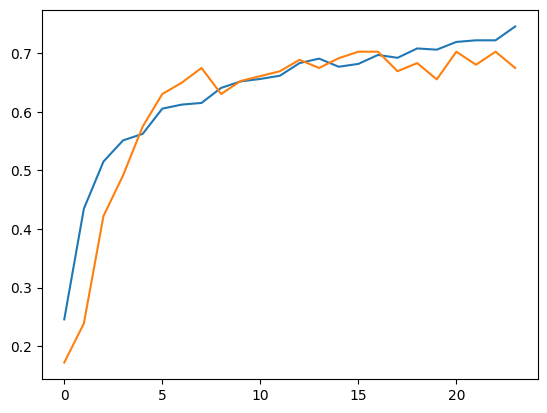

In [ ]:
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])

In [ ]:
model.evaluate(test_set)

90/90 [==============================] - 3s 30ms/step - loss: 1.0196 - accuracy: 0.6750


[1.0196020603179932, 0.675000011920929]

In [ ]:
predict=model.predict(test_set)
predict=np.argmax(predict,axis = 1)
from sklearn.metrics import accuracy_score
Acc = accuracy_score(test_set.classes,predict)
print("Accuracy = ", Acc)

90/90 [==============================] - 3s 29ms/step
Accuracy =  0.07777777777777778


from keras.applications import VGG16 
vgg16 = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg16.trainable = False
model = Sequential()
model.add(vgg16)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model = Sequential()

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
    
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
    
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
    
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
    
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
    
model.add(Conv2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(2622, (1, 1)))
model.add(Flatten())
model.add(Dense(1024, activation='softmax')) # 17 because we have 17 classes
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax')) # 17 because we have 17 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()